In [48]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Import local modules
import datasets

In [49]:
# Read in the dataset
X, Y = datasets.read_highweh_grid()
X = np.take(X, range(64), axis=1)
X.shape

(2211, 64)

In [50]:
# Do PCA and transform data
pca = PCA(n_components=3)
X_t = pca.fit_transform(X)
X_t.shape

(2211, 3)

In [51]:
# Compute the peak height for each model measurement
peak_height = np.max(X, axis=1)
peak_height.shape

(2211,)

Correlation between PC1 and peak height: 0.9953625996146377
Correlation between peak height and WEH: 0.8507429642681772


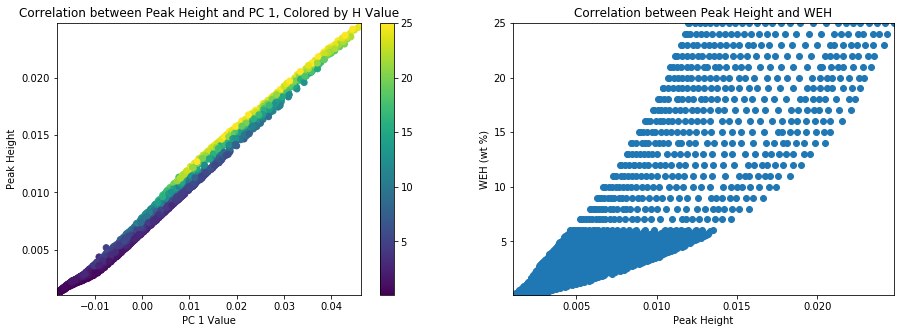

In [67]:
# Plot correlation between PC1 and peak height colored by H
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,0], peak_height, c=Y[:,0])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by H Value')
print "Correlation between PC1 and peak height:", pearsonr(X_t[:,0], peak_height)[0]
p = ax2.scatter(peak_height, Y[:,0])
ax2.set_xlabel('Peak Height')
ax2.set_ylabel('WEH (wt %)')
ax2.set_xlim(np.min(peak_height), np.max(peak_height))
ax2.set_ylim(np.min(Y[:,0]), np.max(Y[:,0]))
ax2.set_title('Correlation between Peak Height and WEH')
print "Correlation between peak height and WEH:", pearsonr(peak_height, Y[:,0])[0]

Correlation between PC1 and peak height: 0.9953625996146377
Correlation between peak height and WEH: -0.4399289189122983


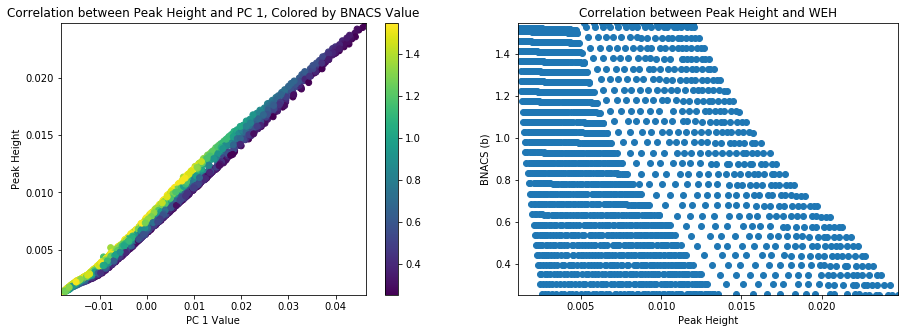

In [68]:
# Plot correlation between PC1 and peak height colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,0], peak_height, c=Y[:,1])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by BNACS Value')
print "Correlation between PC1 and peak height:", pearsonr(X_t[:,0], peak_height)[0]
p = ax2.scatter(peak_height, Y[:,1])
ax2.set_xlabel('Peak Height')
ax2.set_ylabel('BNACS (b)')
ax2.set_xlim(np.min(peak_height), np.max(peak_height))
ax2.set_ylim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_title('Correlation between Peak Height and WEH')
print "Correlation between peak height and WEH:", pearsonr(peak_height, Y[:,1])[0]

In [70]:
# Compute the flux-weighted time of arrival for each model measurement
def fwta(time_bins, counts):
    fwtas = np.ndarray(counts.shape[0])
    for i in range(counts.shape[0]):
        w_sum = 0
        for t in range(counts.shape[1]):
            w_sum += time_bins[t] * counts[i,t]
        fwtas[i] = w_sum / float(np.sum(counts[i,:]))
    return fwtas
arr_time = fwta(datasets.time_bins_dan[:-1], X)

Correlation between PC2 and arrival time: 0.5295450391710043
Correlation between arrival time and WEH: 0.27300631391889174


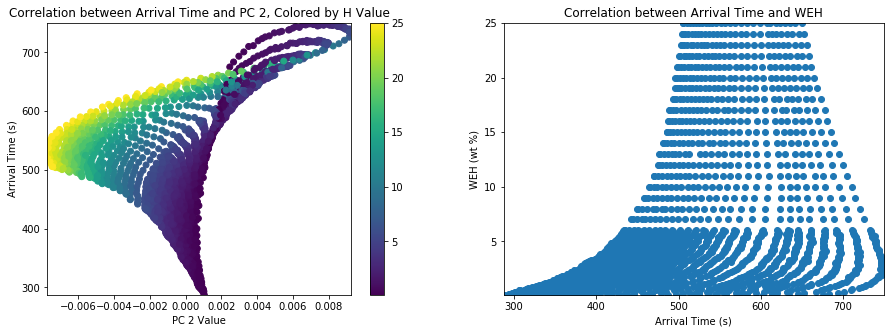

In [75]:
# Plot correlation between PC2 and arrival time colored by H
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,1], arr_time, c=Y[:,0])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Arrival Time (s)')
ax.set_xlabel('PC 2 Value')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by H Value')
print "Correlation between PC2 and arrival time:", pearsonr(X_t[:,1], arr_time)[0]

p = ax2.scatter(arr_time, Y[:,0])
ax2.set_xlabel('Arrival Time (s)')
ax2.set_ylabel('WEH (wt %)')
ax2.set_xlim(np.min(arr_time), np.max(arr_time))
ax2.set_ylim(np.min(Y[:,0]), np.max(Y[:,0]))
ax2.set_title('Correlation between Arrival Time and WEH')
print "Correlation between arrival time and WEH:", pearsonr(arr_time, Y[:,0])[0]

Correlation between arrival time and BNACS: -0.8794613516318937


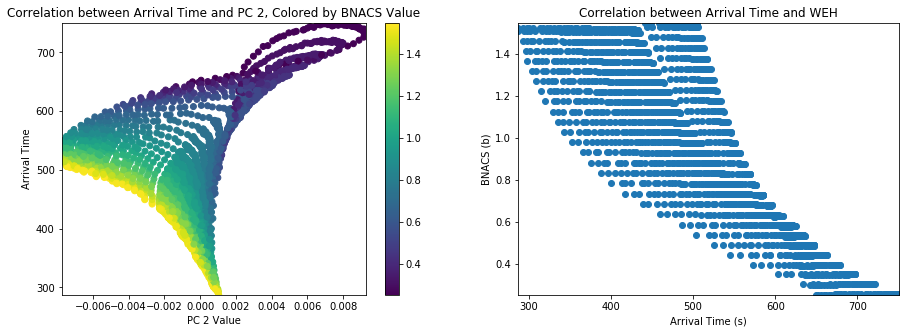

In [77]:
# Plot correlation between PC2 and arrival time colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,1], arr_time, c=Y[:,1])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Arrival Time')
ax.set_xlabel('PC 2 Value')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by BNACS Value')

p = ax2.scatter(arr_time, Y[:,1])
ax2.set_xlabel('Arrival Time (s)')
ax2.set_ylabel('BNACS (b)')
ax2.set_xlim(np.min(arr_time), np.max(arr_time))
ax2.set_ylim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_title('Correlation between Arrival Time and WEH')
print "Correlation between arrival time and BNACS:", pearsonr(arr_time, Y[:,1])[0]

Text(0.5,1,u'PC1 and PC2 vs. $\\Sigma_{abs}$')

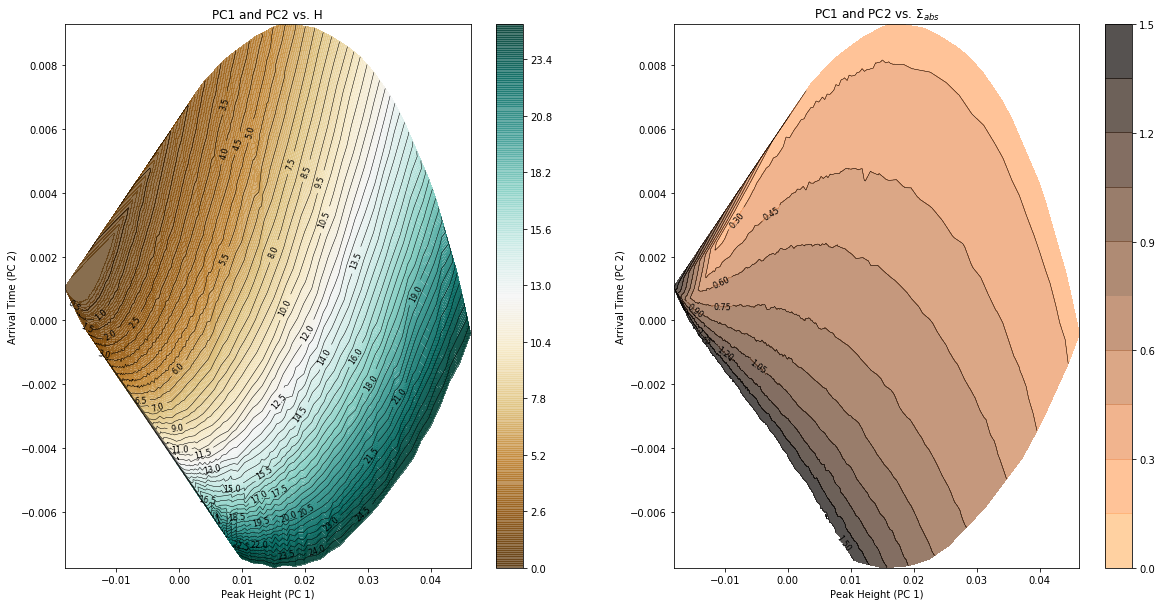

In [29]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
h_max = 25.1
bnacs_max = 1.524
cs = ax3.tricontour(X_t[:,0], X_t[:,1], Y[:,0], levels=np.arange(0, h_max, 0.5), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.1f')
cntr2 = ax3.tricontourf(X_t[:,0], X_t[:,1], Y[:,0], levels=np.arange(0, h_max, 0.1), cmap="BrBG", alpha=0.7)

cs2 = ax4.tricontour(X_t[:,0], X_t[:,1], Y[:,1], levels=np.arange(0, bnacs_max, 0.15), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(X_t[:,0], X_t[:,1], Y[:,1], levels=np.arange(0, bnacs_max, 0.15), cmap="copper_r", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_xlabel('Peak Height (PC 1)')
ax3.set_ylabel('Arrival Time (PC 2)')

ax4.set_xlabel('Peak Height (PC 1)')
ax4.set_ylabel('Arrival Time (PC 2)')

ax3.set_title('PC1 and PC2 vs. H')
ax4.set_title('PC1 and PC2 vs. $\Sigma_{abs}$')

Text(0.5,1,u'PC1 and PC2 vs. $\\Sigma_{abs}$')

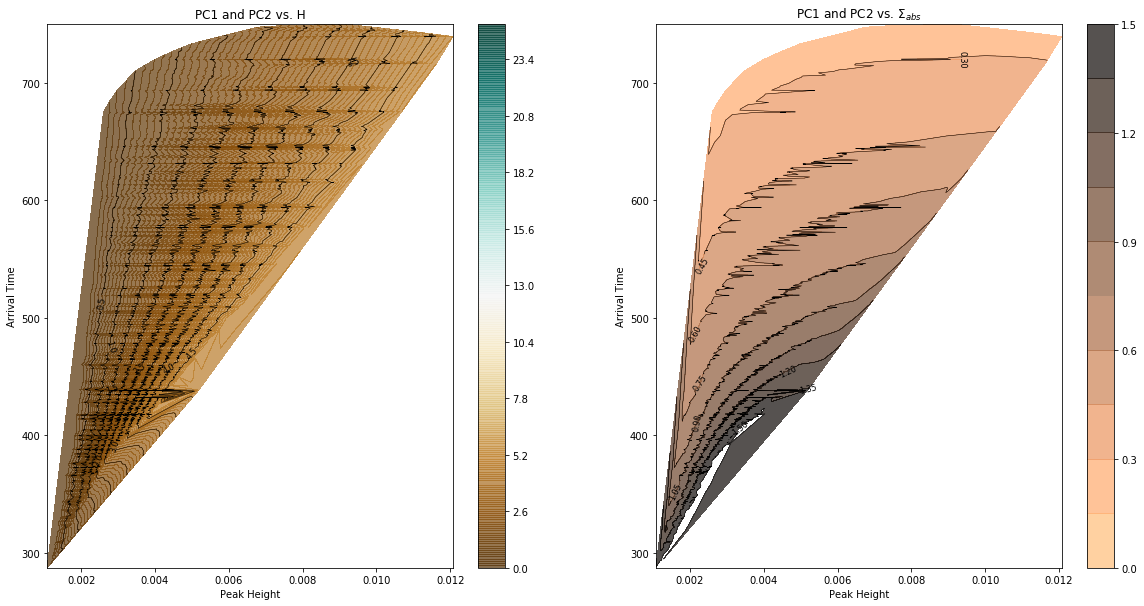

In [46]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
h_max = 25.1
bnacs_max = 1.524
cs = ax3.tricontour(peak_height, arr_time, Y[:,0], levels=np.arange(0, h_max, 0.5), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.1f')
cntr2 = ax3.tricontourf(peak_height, arr_time, Y[:,0], levels=np.arange(0, h_max, 0.1), cmap="BrBG", alpha=0.7)

cs2 = ax4.tricontour(peak_height, arr_time, Y[:,1], levels=np.arange(0, bnacs_max, 0.15), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(peak_height, arr_time, Y[:,1], levels=np.arange(0, bnacs_max, 0.15), cmap="copper_r", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_xlabel('Peak Height')
ax3.set_ylabel('Arrival Time')

ax4.set_xlabel('Peak Height')
ax4.set_ylabel('Arrival Time')

ax3.set_title('PC1 and PC2 vs. H')
ax4.set_title('PC1 and PC2 vs. $\Sigma_{abs}$')

Text(0.5,1,u'WEH and $\\Sigma_{abs}$ vs. FWTA')

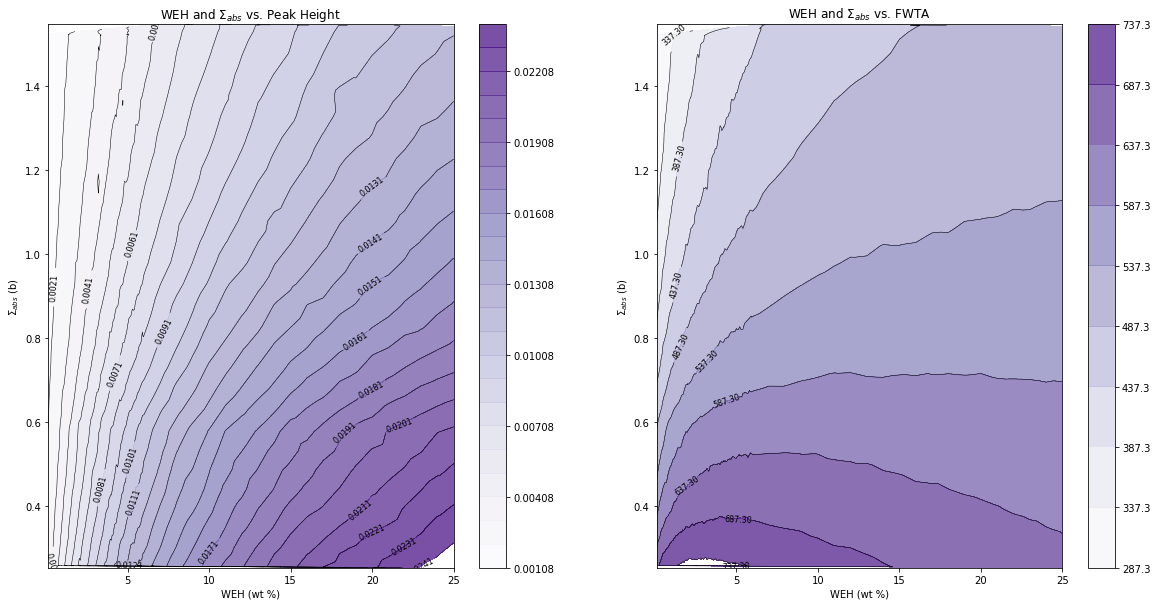

In [43]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

cs = ax3.tricontour(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.4f')
cntr2 = ax3.tricontourf(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), cmap="Purples", alpha=0.7)

cs2 = ax4.tricontour(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), cmap="Purples", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_ylabel('$\Sigma_{abs}$ (b)')
ax3.set_xlabel('WEH (wt %)')

ax4.set_ylabel('$\Sigma_{abs}$ (b)')
ax4.set_xlabel('WEH (wt %)')

ax3.set_title('WEH and $\Sigma_{abs}$ vs. Peak Height')
ax4.set_title('WEH and $\Sigma_{abs}$ vs. FWTA')

Text(0.5,1,u'WEH and $\\Sigma_{abs}$ vs. FWTA')

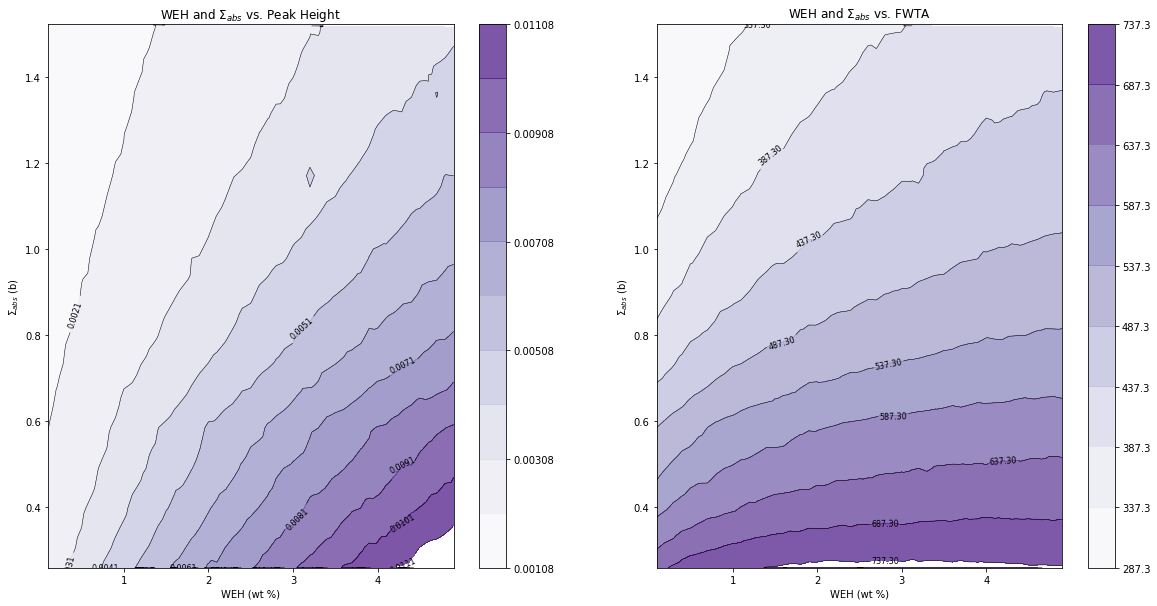

In [44]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

weh0to5 = np.where(Y[:,0] < 5.0)
Y = Y[weh0to5]
peak_height = peak_height[weh0to5]
arr_time = arr_time[weh0to5]

cs = ax3.tricontour(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.4f')
cntr2 = ax3.tricontourf(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), cmap="Purples", alpha=0.7)

cs2 = ax4.tricontour(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), cmap="Purples", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_ylabel('$\Sigma_{abs}$ (b)')
ax3.set_xlabel('WEH (wt %)')

ax4.set_ylabel('$\Sigma_{abs}$ (b)')
ax4.set_xlabel('WEH (wt %)')

ax3.set_title('WEH and $\Sigma_{abs}$ vs. Peak Height')
ax4.set_title('WEH and $\Sigma_{abs}$ vs. FWTA')

(28,)
(28,)
(28,)
(28,)
(28,)


Text(0.5,0,u'$\\Sigma_{abs}$')

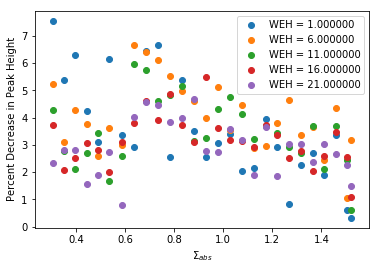

In [31]:
d = 5.0
for h in np.arange(1.0, 25.1, d):
    h = np.round(h, 2) # for precision reasons
    y = Y[np.where(Y[:,0] == h)]
    p = peak_height[np.where(Y[:,0] == h)]
    # get the sorted indices for bnacs then sort everything
    perm = np.argsort(y[:,1])
    y = y[perm]
    p = p[perm]
    print p.shape
    # plot the change in peak height for increments in BNACS
    delta_p = []
    for i in range(y[:,1].shape[0]):
        if i == 0:
            delta_p.append(0)
        else:
            delta_p.append(p[i]-p[i-1])
    fixed_bnacs = [0.26, 0.306, 0.352, 0.398, 0.444, 0.49, 0.536, 0.586, 0.635, 0.685, 0.734, 0.784, 0.833, 0.882, 0.931, 0.979, 1.028, 1.076, 1.125, 1.173, 1.221, 1.269, 1.316, 1.364, 1.411, 1.459, 1.506, 1.521]
    plt.scatter(fixed_bnacs[1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
    #plt.scatter(y[:,1][1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
plt.legend()
plt.ylabel('Percent Decrease in Peak Height')
plt.xlabel('$\Sigma_{abs}$')

This plot is based on Figure 3 from Hardgrove et al. 2011. It shows the percent decrease in thermal peak height with increasing absorber content, given different fixed amounts of WEH.

The BNACS values vary a little bit as different amounts of H affect the computed BNACS value, so instead of using the true BNACS values for each combination of H, Cl, and Fe, I am using the values for a fixed H, Cl, and Fe. 

Each "column" of points has N points for each H value displayed (5 in the current plot). For example, in the first two columns: the % decrease in peak height from 0.306 to 0.352 b is much greater when there's 1 wt % WEH than 21 wt % WEH. 

This plot, in addition to the contour plot, shows how this relationship does not hold for all changes in BNACS, i.e. 0.1 wt % WEH does not always result in the greatest % decrease in peak height compared to the other values. 

(28,)
(28,)
(28,)
(28,)
(28,)


Text(0.5,0,u'$\\Sigma_{abs}$')

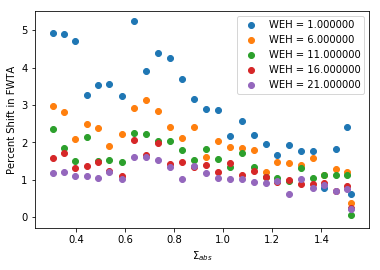

In [32]:
d = 5.0
for h in np.arange(1.0, 25.1, d):
    h = np.round(h, 2) # for precision reasons
    y = Y[np.where(Y[:,0] == h)]
    p = arr_time[np.where(Y[:,0] == h)]
    # get the sorted indices for bnacs then sort everything
    perm = np.argsort(y[:,1])
    y = y[perm]
    p = p[perm]
    print p.shape
    # plot the change in FWTA for increments in BNACS
    delta_p = []
    for i in range(y[:,1].shape[0]):
        if i == 0:
            delta_p.append(0)
        else:
            delta_p.append(p[i]-p[i-1])
    fixed_bnacs = [0.26, 0.306, 0.352, 0.398, 0.444, 0.49, 0.536, 0.586, 0.635, 0.685, 0.734, 0.784, 0.833, 0.882, 0.931, 0.979, 1.028, 1.076, 1.125, 1.173, 1.221, 1.269, 1.316, 1.364, 1.411, 1.459, 1.506, 1.521]
    plt.scatter(fixed_bnacs[1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
    #plt.scatter(y[:,1][1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
plt.legend()
plt.ylabel('Percent Shift in FWTA')
plt.xlabel('$\Sigma_{abs}$')

This is a similarly formatted plot as the previous one, but now we are looking at the % decrease in FWTA. We observed in the previous plot that the relative ordering of the different WEH-level points was not the same across all changes in BNACS values. However in this plot, the relative ordering does seem to hold (for the most part): i.e., 1 wt % WEH always results in a greater decrease in FWTA than 21 wt % WEH for different changes in BNACS.

Another interesting observation is that the spread between the points is highest for low amounts of BNACS and gets smaller through ~1.3 b, but then seems to start increasing again. However this increase could just be an artifact of the plotting because the BNACS values are actually somewhat different for the points at the end. 

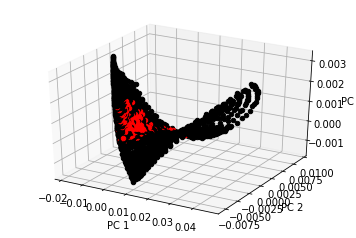

In [33]:
# Plot the DAN data on the modeled data manifold
X_dan, Y_dan, _, _ = datasets.read_dan_data()

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_zlabel('PC 3')
for x_t, (h, acs) in zip(X_t, Y):
    exists = False
    for [h_dan, acs_dan] in Y_dan:
        if np.array_equal(np.array([h, acs]), np.array([h_dan, acs_dan])):
            ax1.scatter(x_t[0], x_t[1], x_t[2], color='red')
            exists = True
            break
    
    if not exists:
        ax1.scatter(x_t[0], x_t[1], x_t[2], color='k')

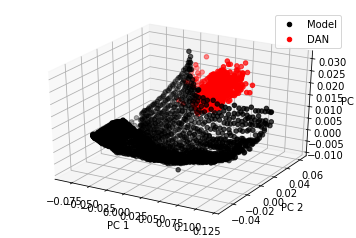

In [41]:
# Normalize the model data and re-fit PCA
X_norm = datasets.normalize_counts(X)
pca2 = PCA(n_components=3)
X_norm_t = pca2.fit_transform(X_norm)
# Normalize the DAN data and project with PCA model
X_dan = np.take(X_dan, range(64), axis=1)
X_dan = datasets.normalize_counts(X_dan)
dan_t = pca2.transform(X_dan)

fig = plt.figure()
ax0 = fig.add_subplot(111, projection='3d')
ax0.set_xlabel('PC 1')
ax0.set_ylabel('PC 2')
ax0.set_zlabel('PC 3')
ax0.scatter(X_norm_t[:,0], X_norm_t[:,1], X_norm_t[:,2], color='k', label='Model')
ax0.scatter(dan_t[:,0], dan_t[:,1], dan_t[:,2], color='red', label='DAN')
ax0.legend(loc='upper right')

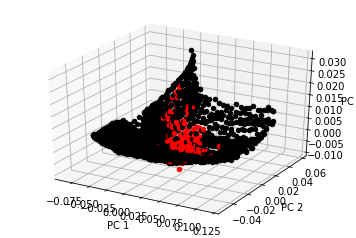

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_zlabel('PC 3')
for x_t, (h, acs) in zip(X_norm_t, Y):
    exists = False
    for [h_dan, acs_dan] in Y_dan:
        if np.array_equal(np.array([h, acs]), np.array([h_dan, acs_dan])):
            ax1.scatter(x_t[0], x_t[1], x_t[2], color='red')
            exists = True
            break
    
    if not exists:
        ax1.scatter(x_t[0], x_t[1], x_t[2], color='k')